###### import libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# loading the dataset using read_csv method
df = pd.read_csv("Salaries.csv")

/home/abdoulaye/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# let check the head of our dataset( head will display first 5 rows by default)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [52]:
salaries = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


##### what is the avarage BasePay ?

In [54]:
# let first convert the object into fload type
df['BasePay']= pd.to_numeric(df['BasePay'], errors='coerce')

In [55]:
df['BasePay'].mean()

66325.44884050643

##### what is the highest amount of Overtime Pay in  the dataset ?

In [56]:
# let do the same to convert object to float
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'],errors = 'coerce')

In [57]:
df['OvertimePay'].max()

245131.88

##### What is the job title of Josheph Driscoll ? 

In [58]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [59]:
df[df['EmployeeName']== 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

##### How much Josheph make including benefits ?

In [60]:
df[df['EmployeeName']== 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

##### What is the name of the highest paid person (including benefits) ?

In [61]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


##### What is the name of the highest paid person (including benefits) ?


In [62]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


##### What was the avarage (mean) BasePay of all employees per year ?

In [63]:
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

##### How much unique job title is there ?

In [64]:
len(df['JobTitle'].value_counts())

2159

In [65]:
# or you can do also
len(df['JobTitle'].unique())

2159

##### Run some basic statistic on the top rows of the dataset for Total Pay including benefits ?

In [66]:
# it means we only take th head then we group by title and describe totalpaybenefits
df.head().groupby('JobTitle').describe()['TotalPayBenefits']

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
CAPTAIN III (POLICE DEPARTMENT),2.0,437094.595,143987.708376,335279.91,386187.2525,437094.595,488001.9375,538909.28
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",1.0,326373.190,NaN,326373.19,326373.1900,326373.190,326373.1900,326373.19
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,1.0,567595.430,NaN,567595.43,567595.4300,567595.430,567595.4300,567595.43
WIRE ROPE CABLE MAINTENANCE MECHANIC,1.0,332343.610,NaN,332343.61,332343.6100,332343.610,332343.6100,332343.61


##### What are the top 5 most common jobs ?

In [67]:
df['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

##### How many job titles were represented by only one person in 2013 ?

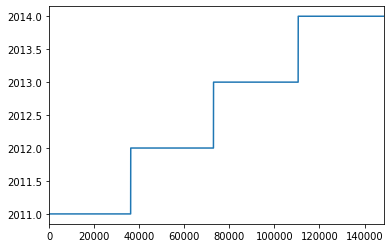

In [68]:
df['Year'].plot()

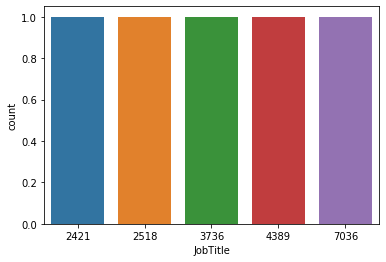

In [70]:
sns.countplot(df['JobTitle'].value_counts().head(),data = df)

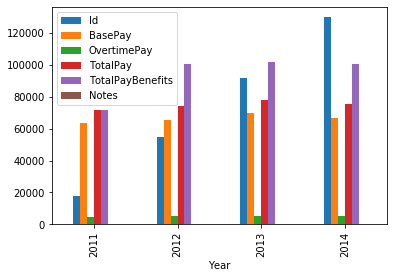

In [72]:
df.groupby('Year').mean().plot(kind = 'bar')

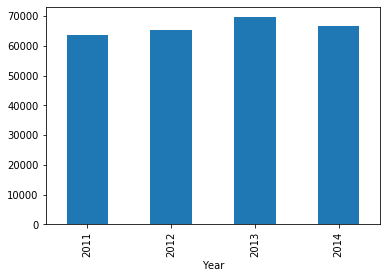

In [73]:
# let see the graph for the avarage basepay per year
df.groupby('Year')['BasePay'].mean().plot(kind='bar')

In [74]:
# what is the avarage of total pay salary
df['TotalPay'].mean()

74768.321971703

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
BasePay,148045.0,66325.448841,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
overtimepay = df['OvertimePay']
basepay = df['BasePay']

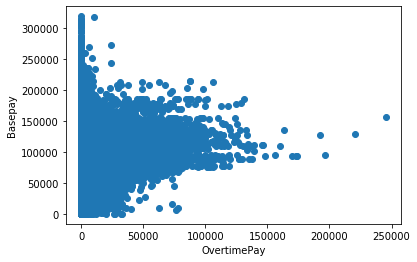

In [81]:
plt.scatter(x=overtimepay, y=basepay)
plt.xlabel('OvertimePay')
plt.ylabel('Basepay')
plt.show()